In [8]:
# Imports (External)
import numpy as np
import pandas as pd
import datetime as dt
import xlrd
import xlsxwriter
from collections import OrderedDict
import copy

import sys
sys.path.append('../')  

# Visualization/plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import pywt
from pywt import wavedec, waverec
import scipy
from scipy import signal
from statsmodels.robust import mad
from sklearn import preprocessing

# Internal Imports
from wsae_lstm.utils import dictmap_load,pickle_load,pickle_save

In [2]:
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
dict_dataframes_index=pickle_load(path_filename="../data/interim/cdii_tvt_split.pickle")
#ddi_denoised=pickle_load(path_filename="../data/interim/cdii_tvt_split_denoised.pickle")

In [4]:
dict_dataframes_index.keys()

dict_keys(['csi300 index data', 'nifty 50 index data', 'hangseng index data', 'nikkei 225 index data', 's&p500 index data', 'djia index data'])

In [5]:
#dict_dataframes_index['csi300 index data'][1][1].info()

In [6]:
#dict_dataframes_index['nifty 50 index data'][1][1].info()

In [7]:
#dict_dataframes_index['hangseng index data'][1][1].info()

In [8]:
# Normalization --> you must be able to accurately estimate the minimum and maximum observable values

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

# potential drop in of robust scaler over standard
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler


In [9]:
#scipy.sparse.issparse(dict_dataframes_index['csi300 index data'][1][1])

In [10]:
#dict_dataframes_index['nifty 50 index data'][1][1].hist();
#dict_dataframes_index['hangseng index data'][1][1].hist();

In [11]:
#dict_dataframes_index['nifty 50 index data'][1][1].hist();


In [12]:
X_train = dict_dataframes_index['nifty 50 index data'][1][1]
X_val = dict_dataframes_index['nifty 50 index data'][1][2]
X_test = dict_dataframes_index['nifty 50 index data'][1][3]

In [29]:
scaler = preprocessing.RobustScaler()
scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [30]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled= pd.DataFrame(X_train_scaled,columns=list(X_train.columns))

X_val_scaled = scaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled,columns=list(X_val.columns))

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=list(X_test.columns))

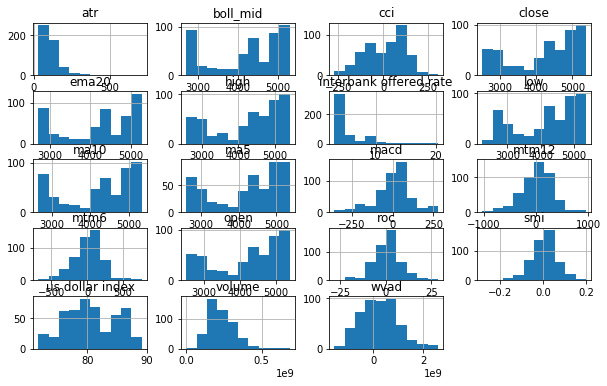

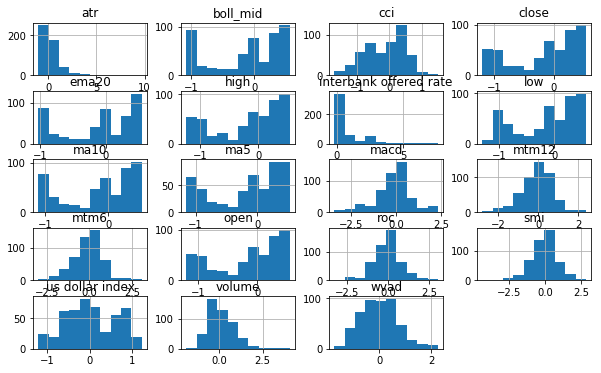

In [31]:
X_train.hist();
X_train_scaled.hist();

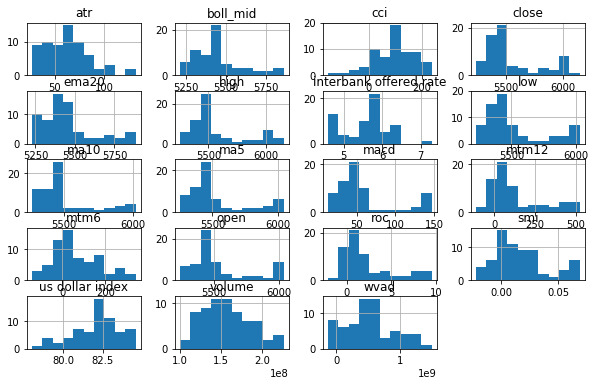

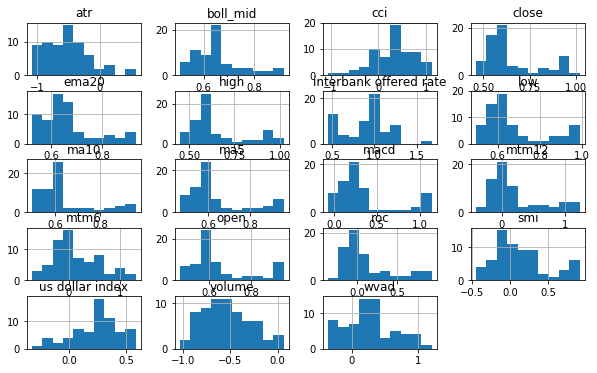

In [32]:
X_val.hist();
X_val_scaled.hist();

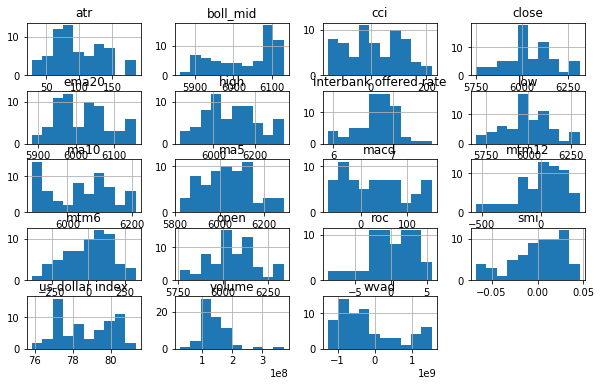

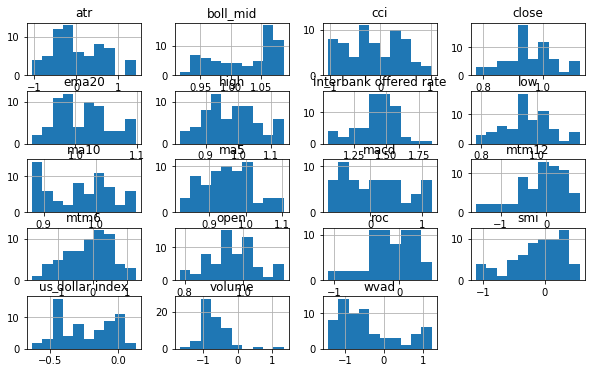

In [33]:
X_test.hist();
X_test_scaled.hist();

In [ ]:
plt.plot(X_train_scaled);

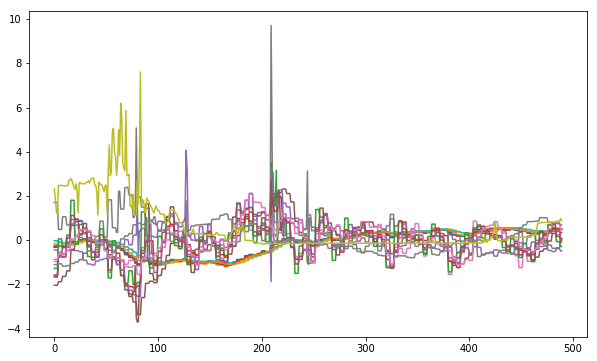

In [36]:
plt.plot(waveletSmooth(X_train_scaled));

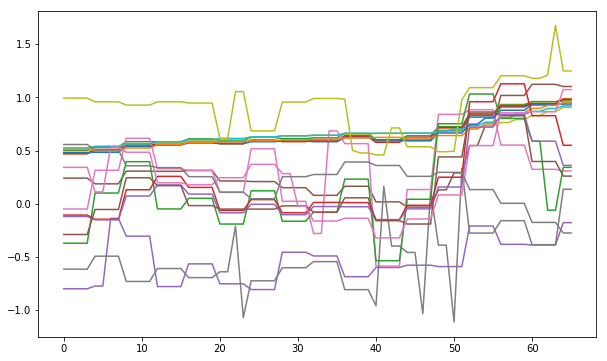

In [37]:
plt.plot(waveletSmooth(X_val_scaled));

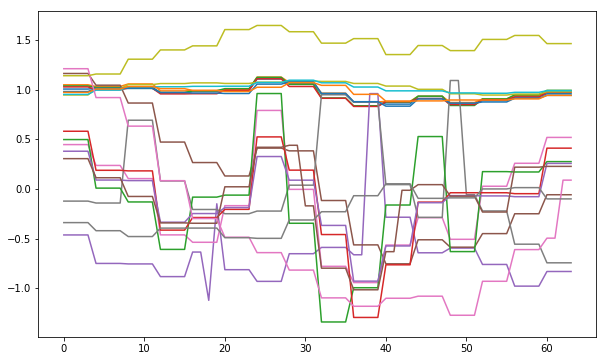

In [38]:
plt.plot(waveletSmooth(X_test_scaled));

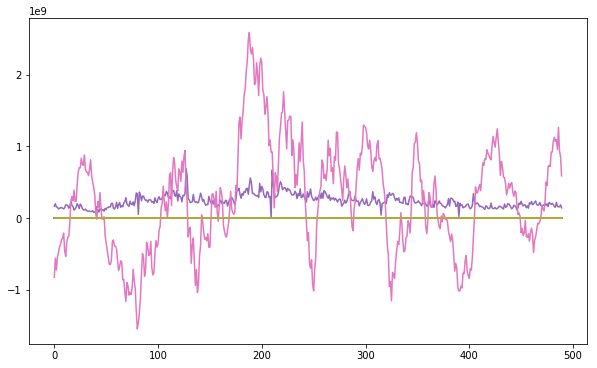

In [41]:
plt.plot(scaler.inverse_transform(X_train_scaled));

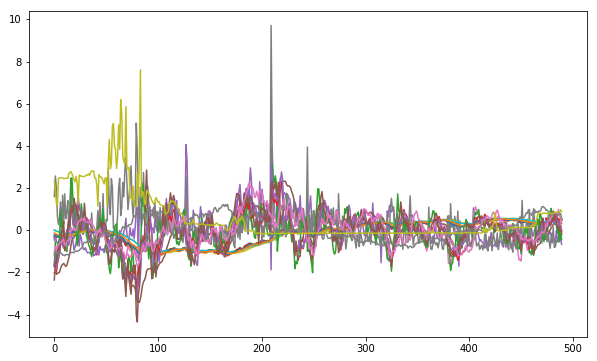

In [42]:
plt.plot(X_train_scaled);